## Acknowledgments
This project uses [Albumentations](https://albumentations.ai), a library for fast and flexible image augmentations. If you use this library in your project, please cite the following paper:
@article{info11020125,
    author = {Buslaev, Alexander and Parinov, Alexander and Khvedchenya, Evgenii and Iglovikov, Vladimir I. and Kalinin, Alexey A.},
    title = {Albumentations: Fast and Flexible Image Augmentations},
    journal = {Information},
    volume = {11},
    year = {2020},
    number = {2},
    article-number = {125},
    url = {https://www.mdpi.com/2078-2489/11/2/125},
    doi = {10.3390/info11020125}
}


In [ ]:
import os
import random
import albumentations as A
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import sys
sys.path.append(r'C:\Users\Max Tost\Desktop\Project2_Road_segmentation')

In [14]:
import cv2
import numpy as np
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.core.transforms_interface import ImageOnlyTransform
import matplotlib.pyplot as plt

def augment_image_and_mask(image, mask, scale_limits):
    """
    Applies basic augmentations to an image and mask for aerial segmentation.

    Args:
        image (np.array): Input RGB image.
        mask (np.array): Corresponding grayscale mask.
        scale_limit (tupel): scaling factor range. If scale_limit is a single float value, the range will be (-scale_limit, scale_limit)

    Returns:
        tuple: Augmented image and mask.
    """
    # Define augmentation pipeline
    aug_pipeline = A.Compose([
        A.RandomBrightnessContrast(p=0.2),          # Adjust brightness/contrast
        A.ShiftScaleRotate(shift_limit=1,        # Random shift/scale/rotate
                           scale_limit=scale_limits, p=1)
    ], additional_targets={'mask': 'mask'})         # Ensure mask is augmented

    # Apply augmentations
    augmented = aug_pipeline(image=image, mask=mask)
    return augmented['image'], augmented['mask']

def visualize(image, mask, augmented_image, augmented_mask):
    """
    Visualize original and augmented image-mask pairs.

    Args:
        image (np.array): Original image.
        mask (np.array): Original mask.
        augmented_image (np.array): Augmented image.
        augmented_mask (np.array): Augmented mask.
    """
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title("Original Image")
    ax[0, 1].imshow(mask, cmap='gray')
    ax[0, 1].set_title("Original Mask")
    ax[1, 0].imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    ax[1, 0].set_title("Augmented Image")
    ax[1, 1].imshow(augmented_mask, cmap='gray')
    ax[1, 1].set_title("Augmented Mask")
    plt.tight_layout()
    plt.show()



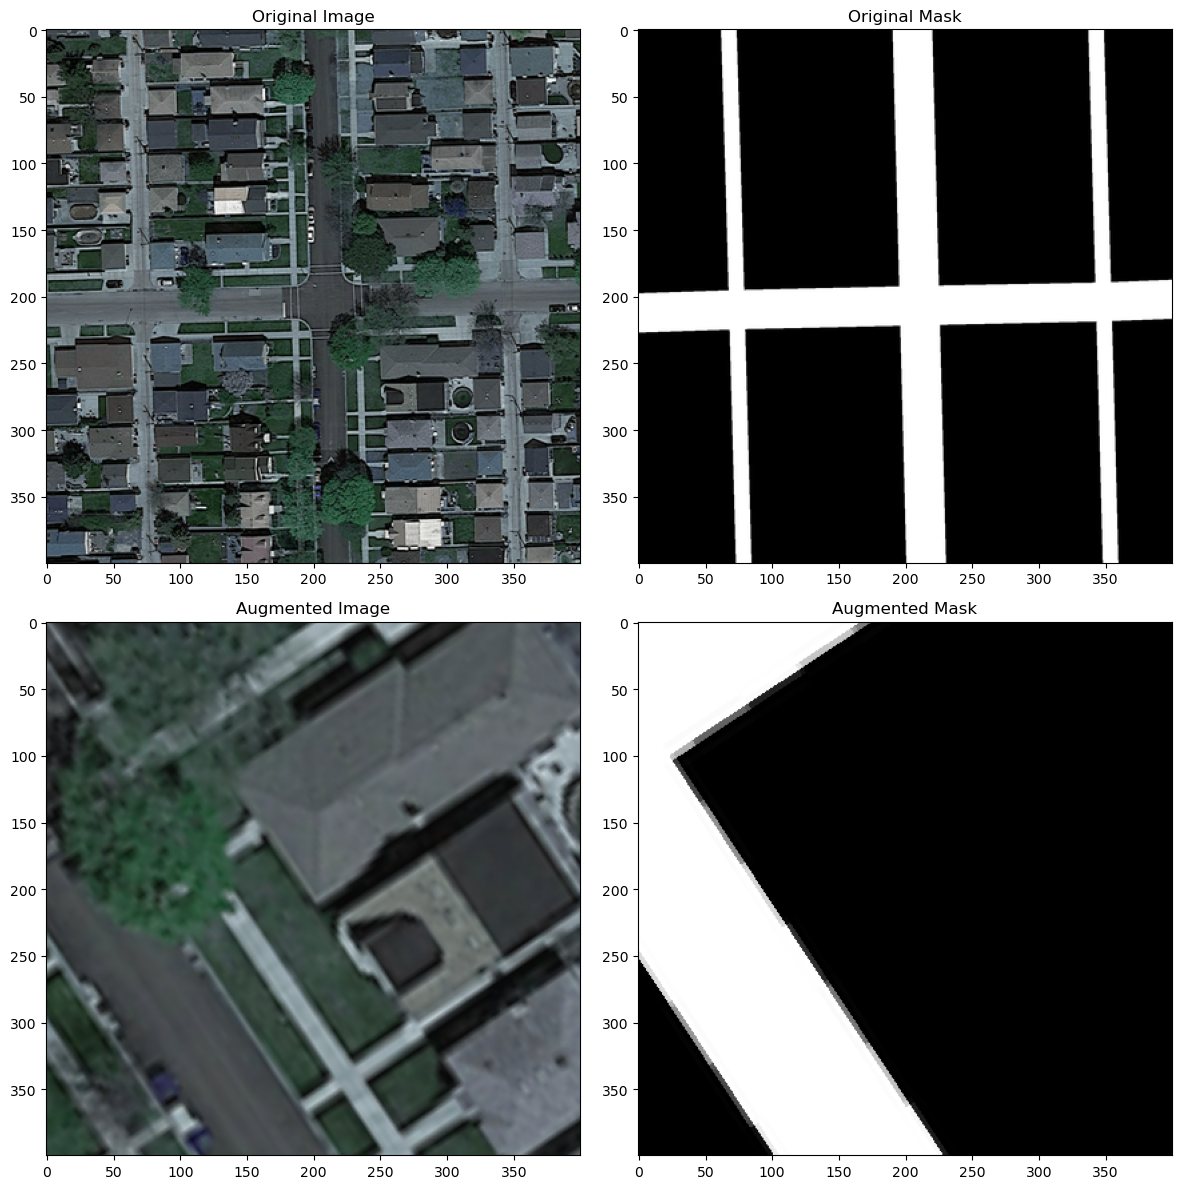

In [20]:
# Load your image and mask
image = cv2.imread(r'C:\Users\Max Tost\Desktop\Project2_Road_segmentation\Data\training\images\satImage_001.png')
mask = cv2.imread(r'C:\Users\Max Tost\Desktop\Project2_Road_segmentation\Data\training\groundtruth\satImage_001.png', cv2.IMREAD_GRAYSCALE)

# Ensure both image and mask are in expected formats
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
mask = mask.astype(np.uint8)                   # Ensure mask is uint8

# Apply augmentations
augmented_image, augmented_mask = augment_image_and_mask(image, mask,(0.3, 5))

# Visualize results
visualize(image, mask, augmented_image, augmented_mask)